###  Business Understanding 


#### Problem Statement 

Telecommunication companies face significant challenges with customer retention. The primary problem is to identify which customers are likely to churn (i.e., stop using the service) and understand the factors influencing this behavior. This insight will help in implementing targeted strategies to improve customer retention.



#### Goal and Objectives

#### Goal:

* To develop a predictive model that accurately identifies customers who are likely to churn

#### Objectives:

1. Analyze historical customer data to identify patterns and trends.
2. Identify key factors that influence customer churn.
3. Develop a classification model to predict the likelihood of customer churn.
4. Calculate the Customer Lifetime Value (CLV) for each customer.
5. Provide actionable insights and recommendations to reduce churn rates.

#### Stakeholders

#####  Primary Stakeholders:

* Marketing Team
* Custumer Retention Team
* Data Analytics Team
* Senior Management

#####  Secondary Stakeholders:

* Customer Service Team
* Sales Team
* IT Department

#### Key Metrics and Success Criteria
* Accurancy of the predictive model
* Precision and Recall to ensure the model identifies actual churners correctly
* ROC - AUC Score to evaluate model's performance
* Reduction in Churn Rate post -implementation of recommendations
* Increase in Customer lifeline Value (CLV) after targeted interventions

#### Features
- customerID
- gender
- SeniorCitizen
- Partner
- Dependents
- tenure
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- MonthlyCharges
- TotalCharges
- Churn



#### Hypothesis
- Null Hypothesis (H₀): There is a significant relationship between the total amount charged to a customer and their likelihood of churning.
    
- Alternate Hypothesis (H₁): There is no significant relationship between the total amount charged to a customer and their likelihood of churning.
​




#### Analytical Questions
- Qi. what is the proportion of cusotmers who have churned to those who have not ?
- Qii Are senior citizens more likely to churn compared to younger customers?
- Qiii How do churn rates vary between customers using DSL, Fiber Optic, or no internet service?
- Qiv Is there any pattern in customer churn based on gender?
- Qv Do customers with Longer tenure have less churn ?



#### Scope and Constraints

##### Scope:

* The analysis will focus on historical data provided by the telecommunication company.
* Development of a machine learning model to predict churn.
* Calculation and analysis of Customer Lifetime Value (CLV).
* Provide recommendations based on the findings.

##### Constraints:

* Availability and quality of historical data.
* Data privacy and security concerns.
* Limited by the features available in the dataset.

#### Additional Information

##### Data Sources:

* Customer demographics
* Usage patterns (call duration, data usage)
* Service logs (complaints, outages)
* Payment history
* Customer feedback and survey responses

#### Tools and Technologies

* Data analysis: Python, Pandas, NumPy
* Data visualization: Matplotlib, Seaborn, Tableau
* Machine learning: Scikit-learn, XGBoost
* Data preprocessing: MinMaxScaler, LabelEncoder

#### Deliverables:

* A detailed report on factors influencing customer churn.
* A predictive model with performance metrics.
* Customer Lifetime Value (CLV) calculations.
* Actionable insights and recommendations.
* Visualizations and dashboards for key metrics.

###  Data Understanding

####  1. Importations 

In [1558]:
# Data Manipulation packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm


# Database connectivity
import pyodbc
from sqlalchemy import create_engine

# Managing environment variables
from dotenv import dotenv_values

# Statistical Packages
from scipy.stats import linregress
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline as imbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_curve
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest ,mutual_info_classif
import joblib
import os


#### 2. Load Dataset

- First Data set

In [1559]:
# Load environment variable from .env file into a directory
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")


In [1560]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [1561]:
# This will connect to the server and might take a few seconds to be complete. 
connection = pyodbc.connect(connection_string)

In [1562]:
# Now the sql query to get the data is what what you see below. 

#query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

# select data from 2020

query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

data1 = pd.read_sql(query, connection)
data1.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_23996\4017826265.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data1 = pd.read_sql(query, connection)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [1563]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [1564]:
data1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [1565]:
# Accessing the second data set, downlaoded from Git-hub into data folder. 

data2 = pd.read_csv('../data/LP2_Telco-churn-second-2000.csv')

data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [1566]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [1567]:
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1568]:
data2 = pd.DataFrame(data2)

# Select columns of type 'object' (string) or 'category'
categorical_columns = data2.select_dtypes(include=['object', 'category']).columns

# Display the categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [1569]:
# Get the column names from each DataFrame
columns_data1 = set(data1.columns)
columns_data2 = set(data2.columns)

# Check if all DataFrames have the same column names
if columns_data1 == columns_data2:
    print("All DataFrames have the same column names.")
else:
    print("Not all DataFrames have the same column names.")

All DataFrames have the same column names.


In [1570]:
# concatenating all the dataframes together
main_df = pd.concat([data1, data2], axis=0) 
main_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


#### 3. EDA

- 1. Data Quality Assessment & Exploring data (info, duplicated, null values, describe)

In [1571]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [1572]:
# check for missing values
main_df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [1573]:
# Check for duplicates in the data
main_df.duplicated().sum()

np.int64(0)

In [1574]:
# convert the totalcharge column to numerical datatype
main_df['TotalCharges'] =pd.to_numeric(main_df['TotalCharges'],errors='coerce')

In [1575]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [1576]:
main_df.describe(include ='object').T

,count,unique,top,freq
customerID,5043,5043,3186-AJIEK,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


###### - The dataset comprises 21 columns and 5,043 rows.
###### - There are 269 missing values in the "multiplelines" column, 5 missing values in the "Totalcharges" column, and 1 missing value in the "churn" column.
###### - The "OnlineSecurity," "OnlineBackup," "DeviceProtection," "TechSupport," "StreamingTV," and "StreamingMovies" columns each have 651 missing values.
###### - The "Totalcharges" column is in string format instead of float.
###### - The data is not normally distributed.
###### - There are no duplicate entries in the dataset.

In [1577]:
# Print out columns
columns = main_df.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1578]:
#checking for unique values
for column in columns:
    print(f"{column}")
    print(f"There are {main_df[column].nunique()} unique values")
    print(f'{main_df[column].unique()}')
    print('-' * 50)

customerID
There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender
There are 2 unique values
['Female' 'Male']
--------------------------------------------------
SeniorCitizen
There are 2 unique values
[0 1]
--------------------------------------------------
Partner
There are 4 unique values
[True False 'No' 'Yes']
--------------------------------------------------
Dependents
There are 4 unique values
[False True 'No' 'Yes']
--------------------------------------------------
tenure
There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService
There are 4 unique values
[False True 'Yes' 'No']
--------------------------------

- Data Cleaning



In [1579]:
#define a dictionary to map boolean and None values to a meaningful categories
mapping_new_cat_values = {
    'Partner':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes',},
    'Dependents':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'PhoneService':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'MultipleLines':{ False:'No', True:'Yes', 'No':'No', 'No phone service':'No phone service' , 'Yes':'Yes'},
    'OnlineSecurity':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service' },
    'OnlineBackup':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'DeviceProtection':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'TechSupport':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingTV':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingMovies':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'PaperlessBilling':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'Churn':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'SeniorCitizen':{0:'No',1:'Yes'}
    }
    # convert the columns to category_column
for col in mapping_new_cat_values.keys():
    main_df[col] = main_df[col].astype('category')
# map the boolean and None values to meaningful categories  

main_df.replace(mapping_new_cat_values, inplace=True)
main_df.head(20)

C:\Users\pc\AppData\Local\Temp\ipykernel_23996\409286895.py:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  main_df.replace(mapping_new_cat_values, inplace=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
7,6713-OKOMC,Female,No,No,No,10,No,NaN,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.150002,3487.949951,No


- 2. Univariate Analysis

- Numerical Variables visualization

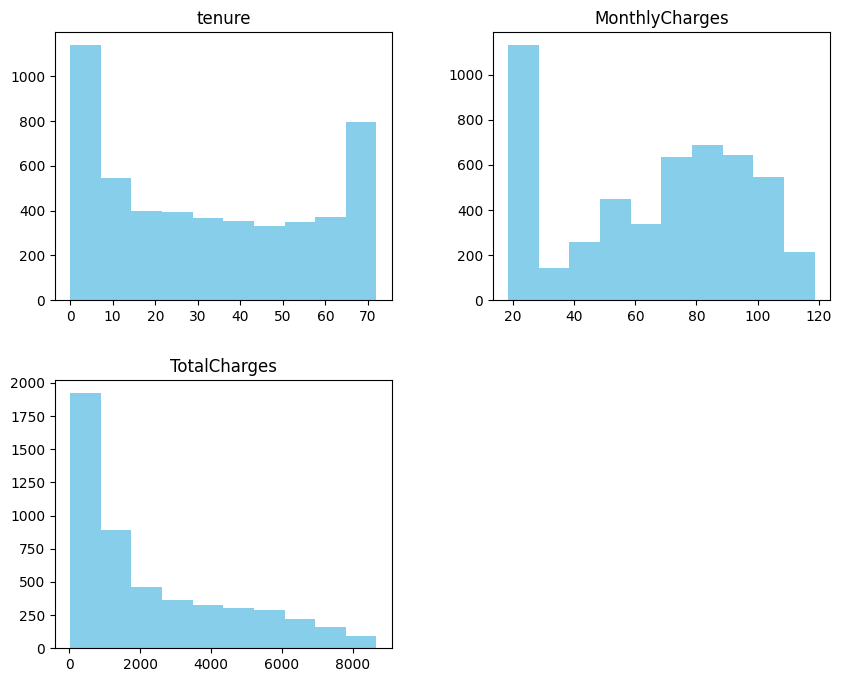

In [1580]:
# visualizing the distribution of the numeric columns
main_df.hist(figsize=(10,8),grid=False,color='skyblue')
plt.show()

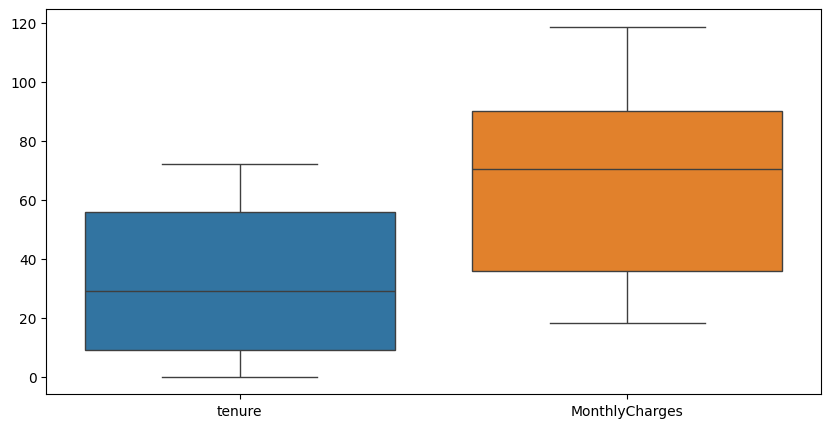

In [1581]:
plt.figure(figsize=(10,5))
sns.boxplot(main_df.drop(['TotalCharges'],axis=1))
plt.show()

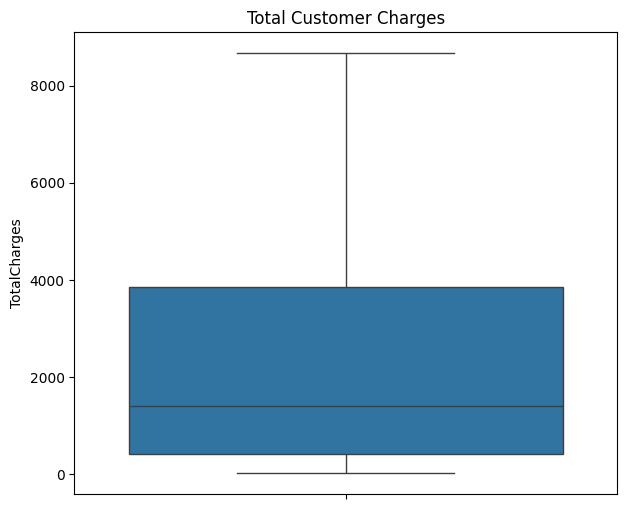

In [1582]:

plt.figure(figsize=(7,6))
sns.boxplot(main_df['TotalCharges'])
plt.title('Total Customer Charges')
plt.show()


Categorical Variables visualization

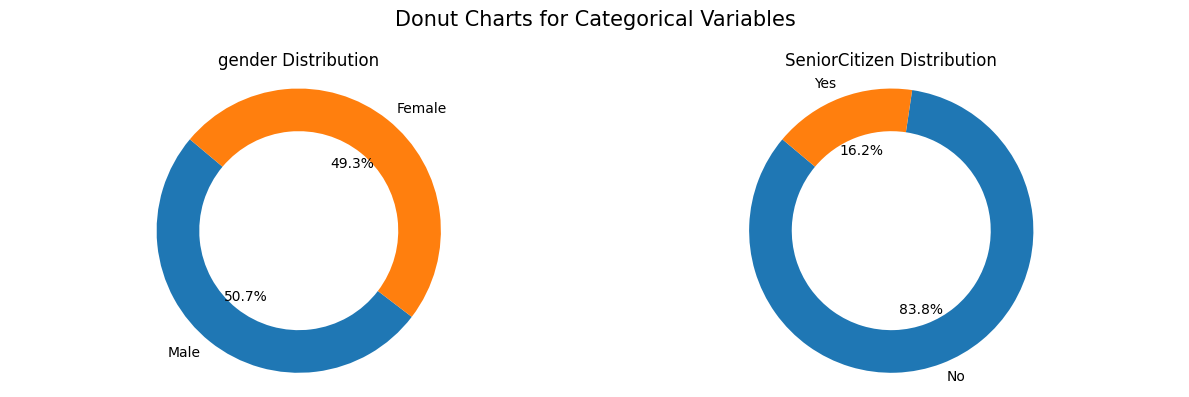

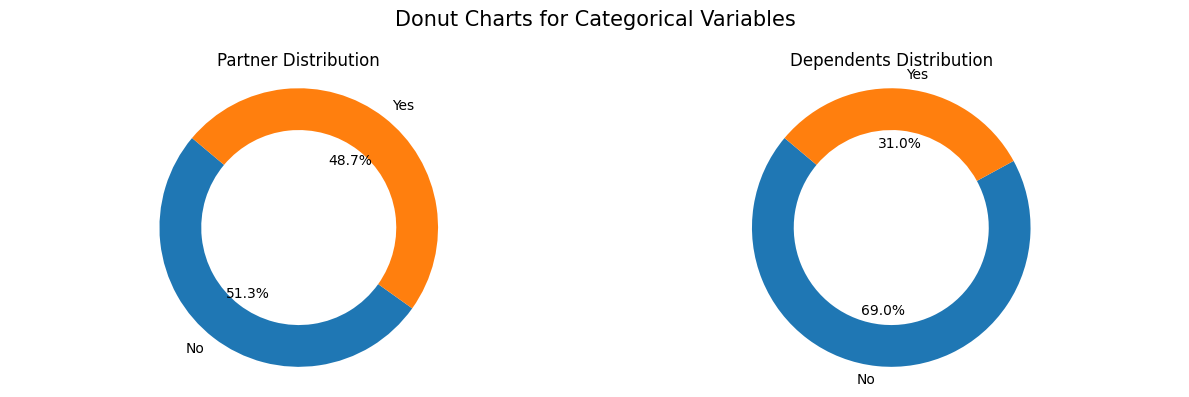

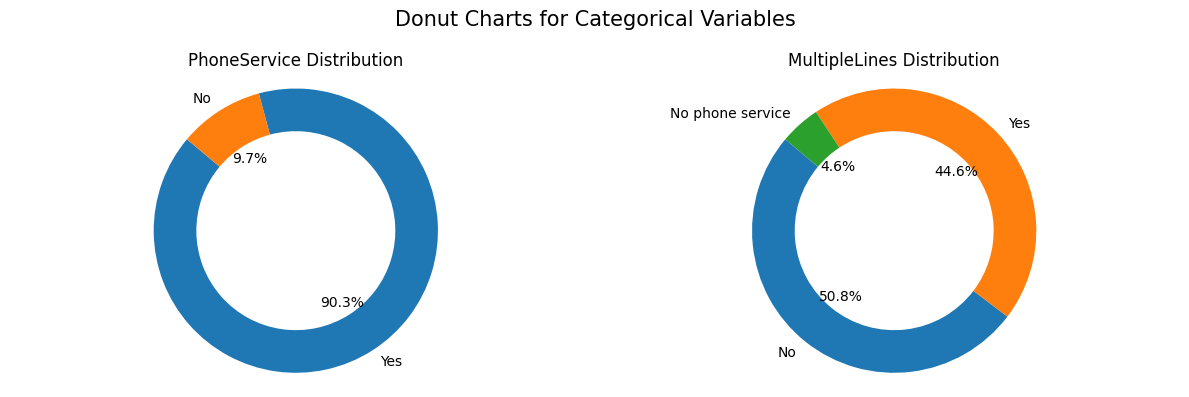

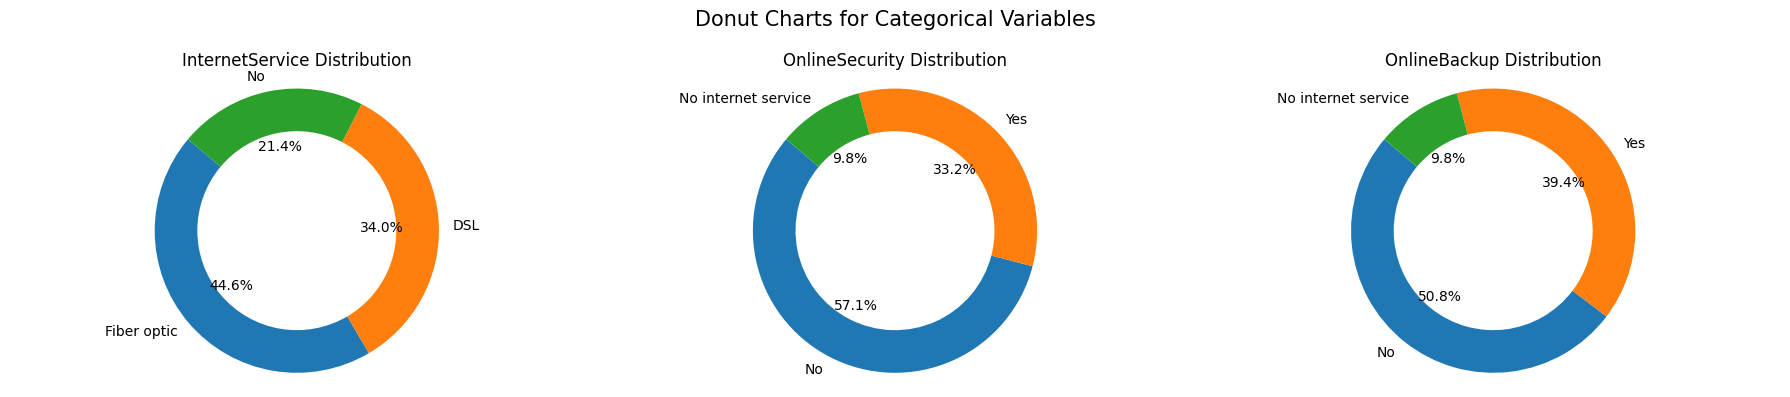

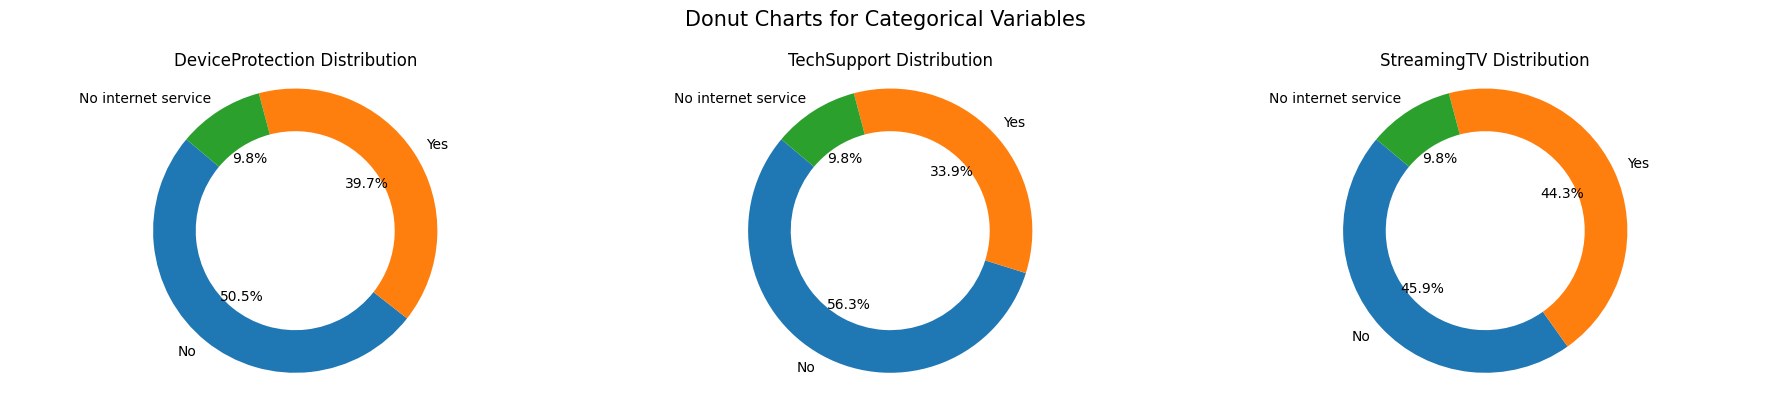

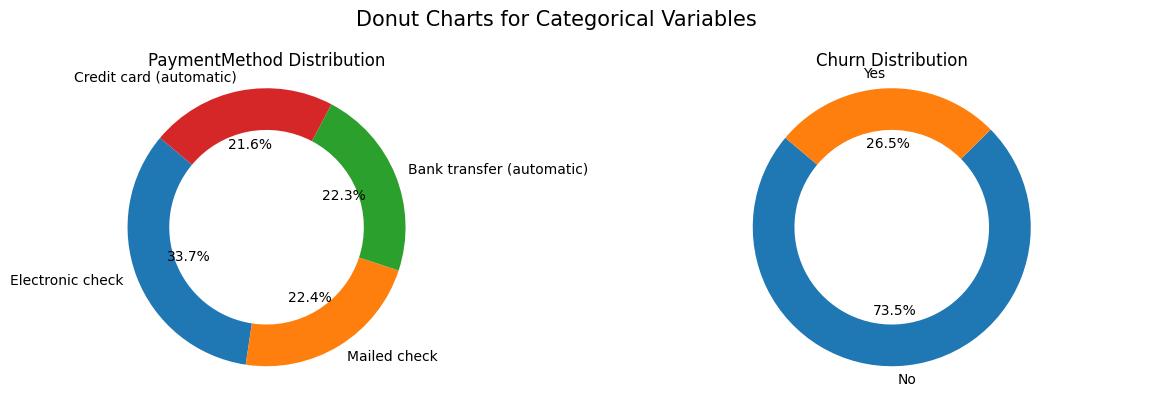

In [1583]:
# Define the pairs or threes of categorical columns
cat_cols_pairs = [
    ('gender', 'SeniorCitizen'), 
    ('Partner', 'Dependents'), 
    ('PhoneService', 'MultipleLines'),
    ('InternetService', 'OnlineSecurity', 'OnlineBackup'),
    ('DeviceProtection', 'TechSupport', 'StreamingTV'),
    ('PaymentMethod', 'Churn')
]

# Plotting donut charts for pairs or threes of categorical variables
for cols in cat_cols_pairs:
    fig, axs = plt.subplots(1, len(cols), figsize=(6 * len(cols), 4))
    fig.suptitle('Donut Charts for Categorical Variables', fontsize=15)
    
    for i, col in enumerate(cols):
        data = main_df[col].value_counts()
        axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
        axs[i].set_title(f'{col} Distribution')
        axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.tight_layout()
    plt.show()

- Bi-Variate Analysis

<Figure size 1300x1700 with 0 Axes>

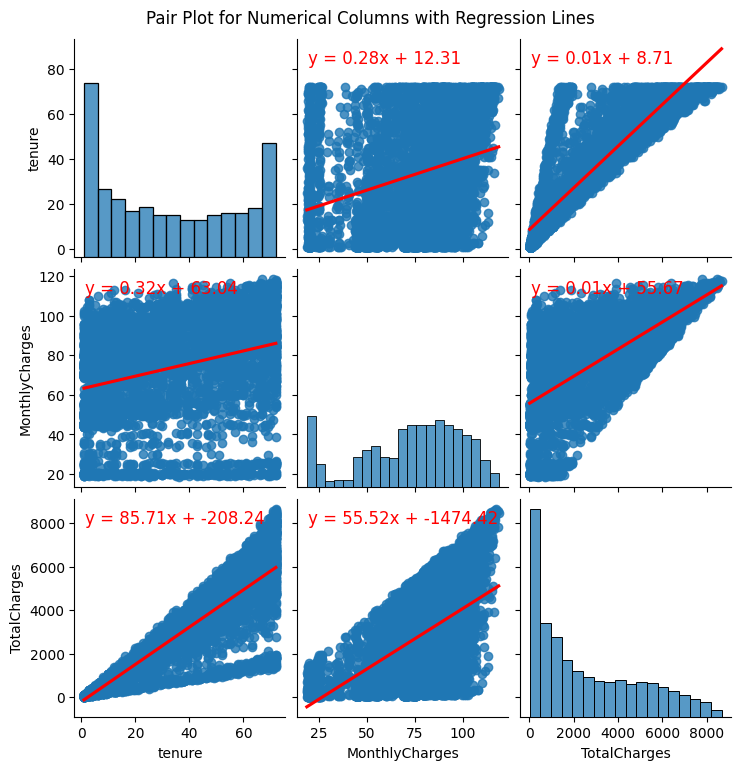

In [1584]:
# Handle missing values
df = main_df.dropna()

# List of numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Pair plot to visualize all pairwise relationships with regression lines
plt.figure(figsize=(13, 17))
pair_plot = sns.pairplot(df[num_cols], kind='reg', plot_kws={'ci': None, 'line_kws': {'color': 'red'}})

# Add equations to each plot
for i, ax in enumerate(pair_plot.axes.flatten()):
    if ax is None:
        continue
    
    x_var = ax.get_xlabel()
    y_var = ax.get_ylabel()
    
    if x_var == '' or y_var == '':
        continue

    # Fit a linear regression model
    X = df[x_var].values.reshape(-1, 1)
    Y = df[y_var].values
    reg = LinearRegression().fit(X, Y)
    intercept = reg.intercept_
    slope = reg.coef_[0]

    # Calculate the equation of the regression line
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=12, verticalalignment='top', color='red')

plt.suptitle('Pair Plot for Numerical Columns with Regression Lines', y=1.02)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_23996\2175159192.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df[col].fillna('Missing', inplace=True)


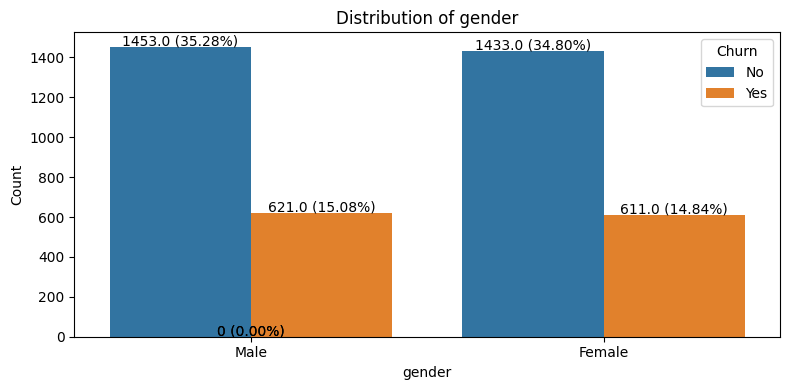

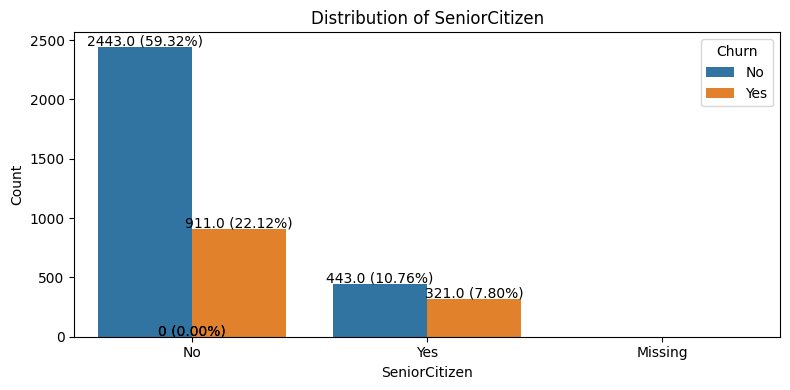

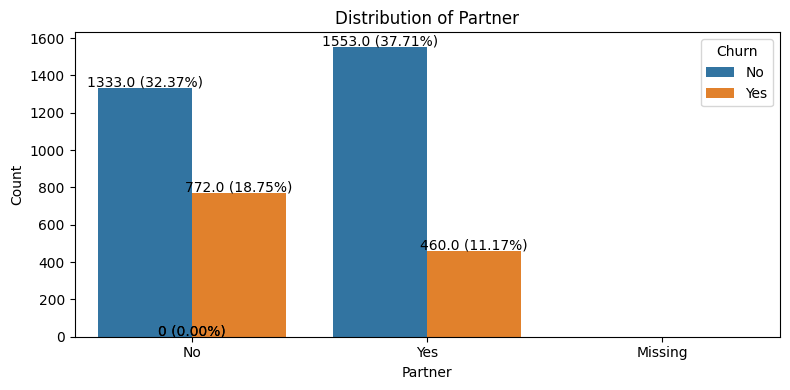

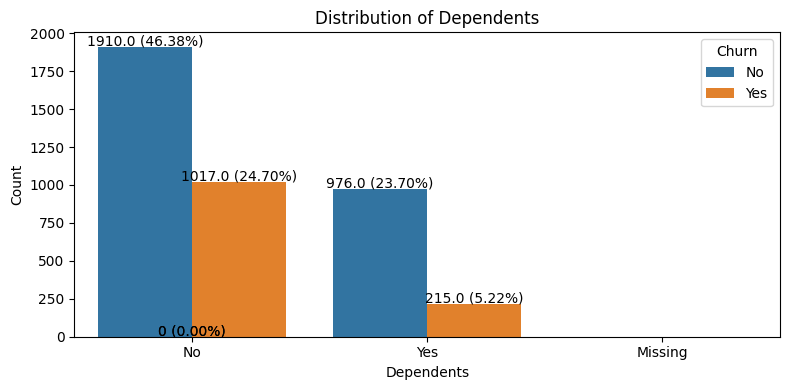

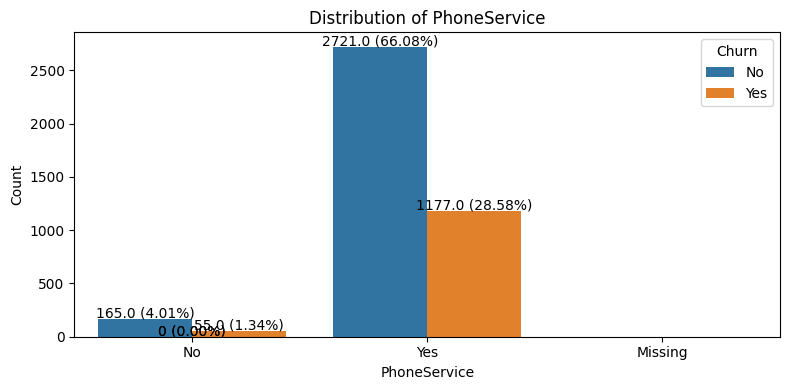

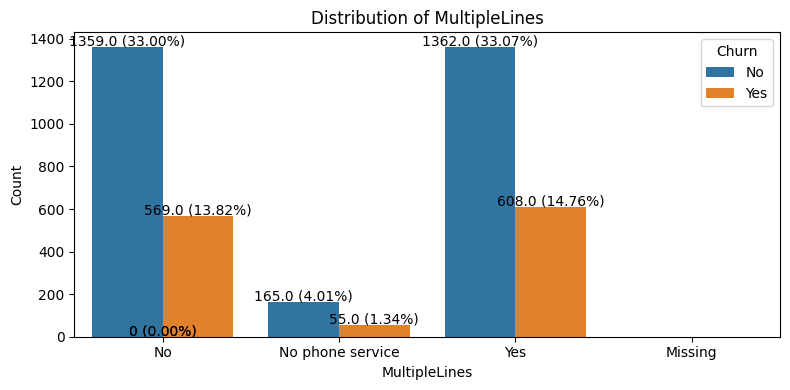

C:\Users\pc\AppData\Local\Temp\ipykernel_23996\2175159192.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df[col].fillna('Missing', inplace=True)


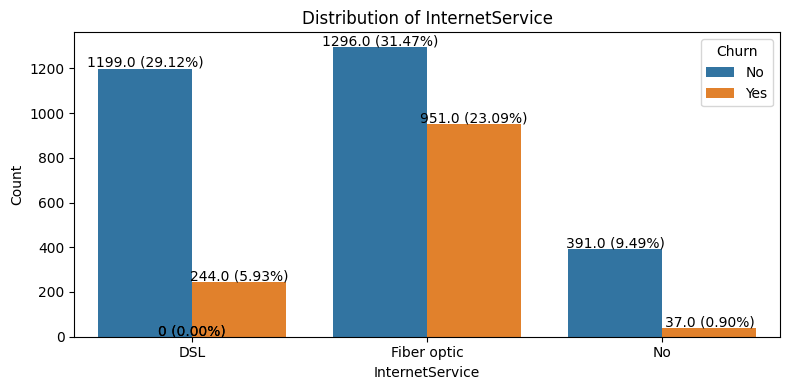

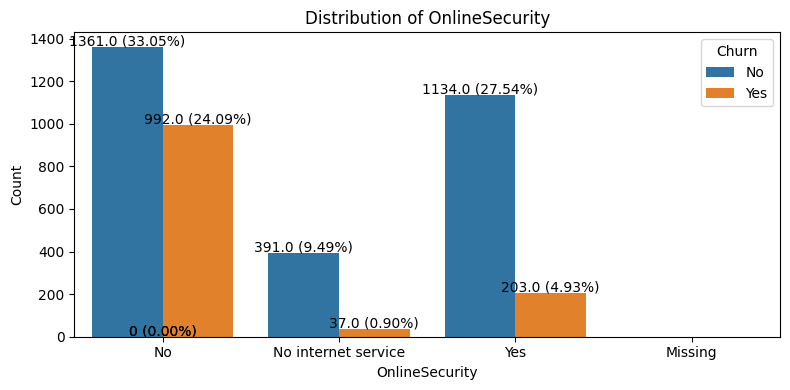

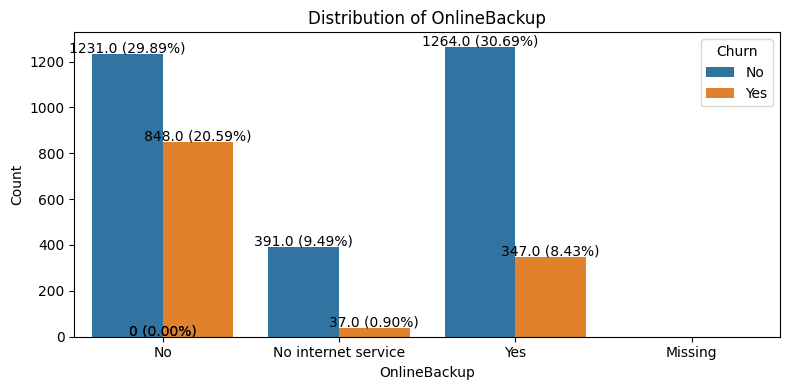

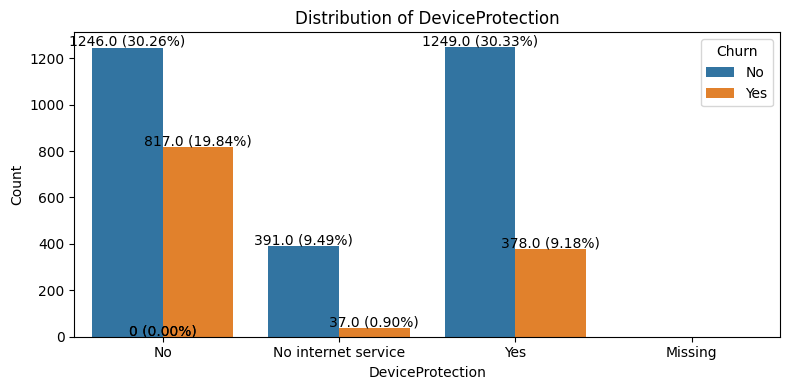

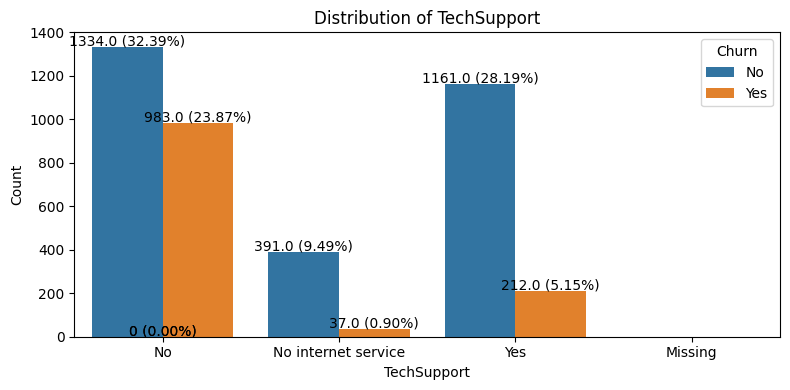

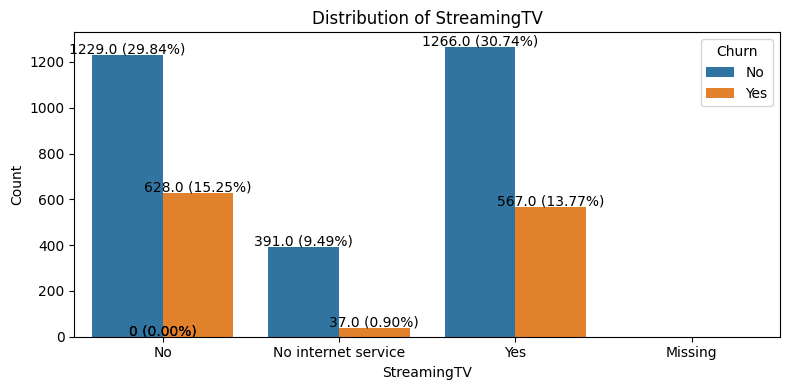

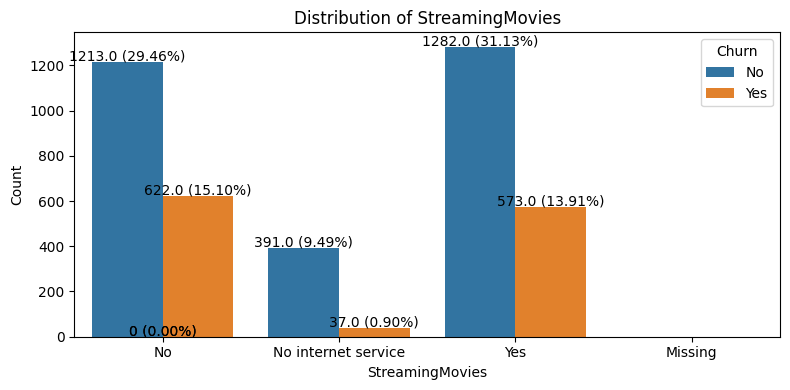

C:\Users\pc\AppData\Local\Temp\ipykernel_23996\2175159192.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df[col].fillna('Missing', inplace=True)


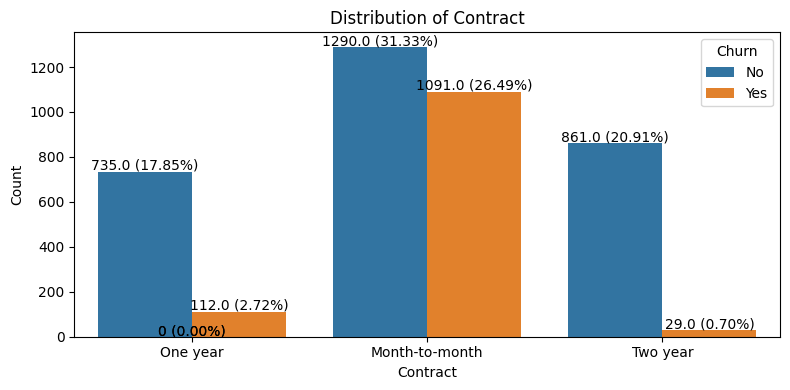

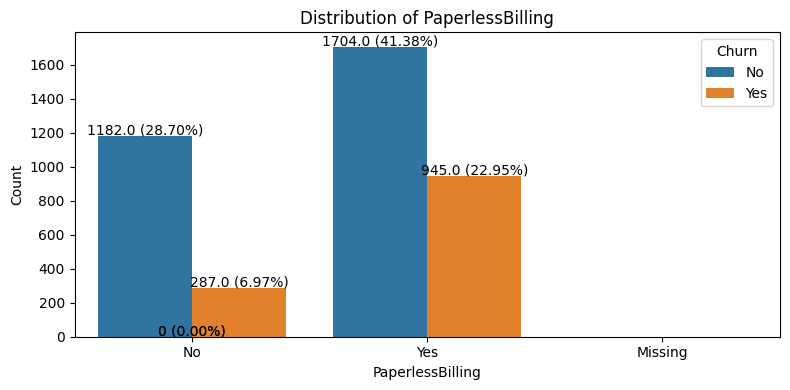

C:\Users\pc\AppData\Local\Temp\ipykernel_23996\2175159192.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df[col].fillna('Missing', inplace=True)


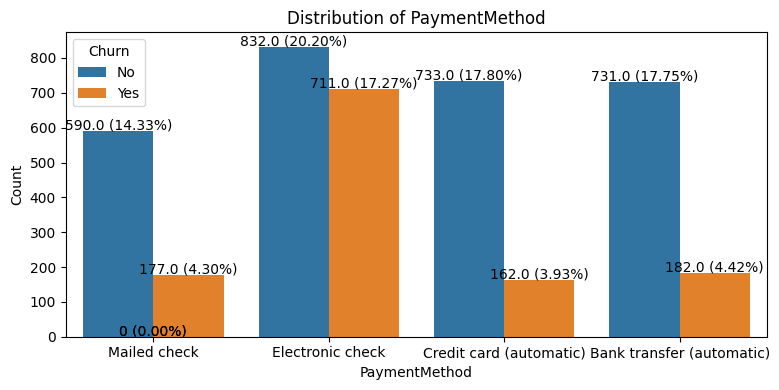

In [1585]:
# List of categorical columns
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Function to add labels with numbers and percentages to the plots
def add_labels(ax, total_count):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()} ({p.get_height()/total_count*100:.2f}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')

# Split the categorical columns into smaller chunks
chunk_size = 5
chunks = [cat_cols[i:i + chunk_size] for i in range(0, len(cat_cols), chunk_size)]

# Plotting univariate distributions for categorical variables with 'Churn' as hue
for chunk in chunks:
    for col in chunk:
        plt.figure(figsize=(8, 4))

        # Fill missing values temporarily for plotting
        temp_df = df.copy()
        if temp_df[col].dtype.name == 'category':
            temp_df[col] = temp_df[col].cat.add_categories('Missing').fillna('Missing')
        else:
            temp_df[col].fillna('Missing', inplace=True)

        ax = sns.countplot(data=temp_df, x=col, hue='Churn')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Add labels with numbers and percentages
        add_labels(ax, temp_df.shape[0])

        plt.tight_layout()
        plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_23996\3830186030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract', y='tenure', data=main_df, palette='Set2')


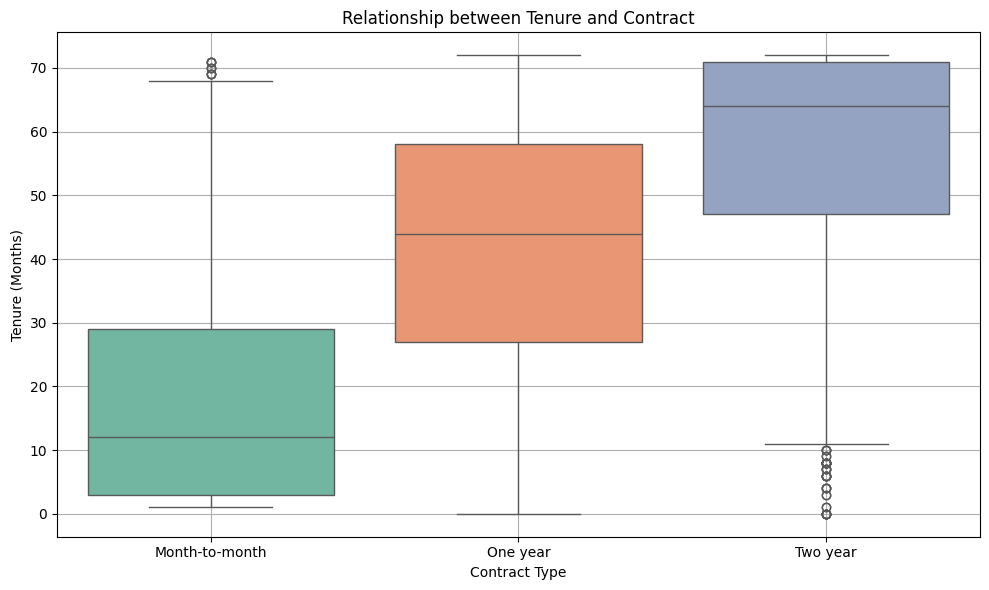

In [1586]:

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', data=main_df, palette='Set2')
plt.xlabel('Contract Type')
plt.ylabel('Tenure (Months)')
plt.title('Relationship between Tenure and Contract')
plt.grid(True)
plt.tight_layout()
plt.show()


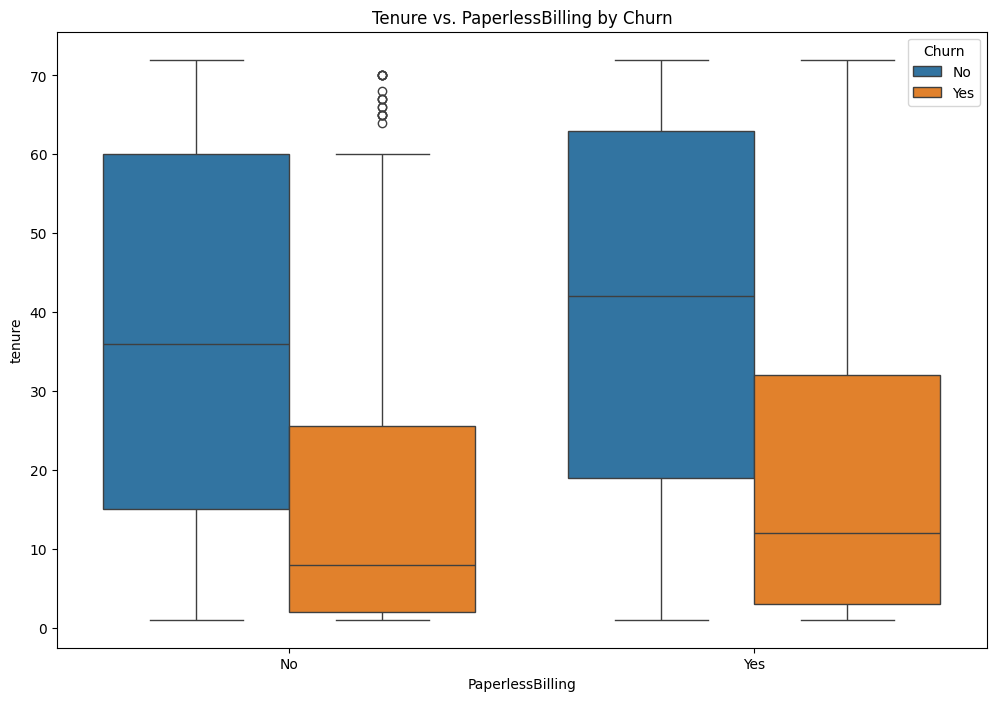

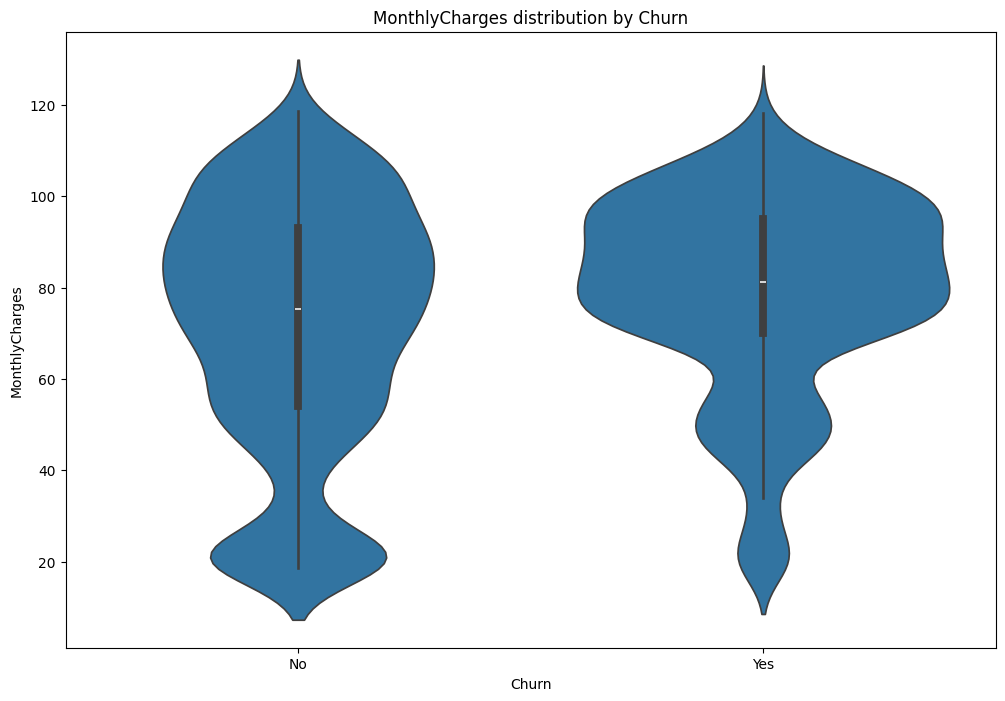

In [1587]:
# Boxplot for categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='PaperlessBilling', y='tenure', hue='Churn', data=df)
plt.title('Tenure vs. PaperlessBilling by Churn')
plt.show()

# Violin plot for numerical variables
plt.figure(figsize=(12, 8))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges distribution by Churn')
plt.show()

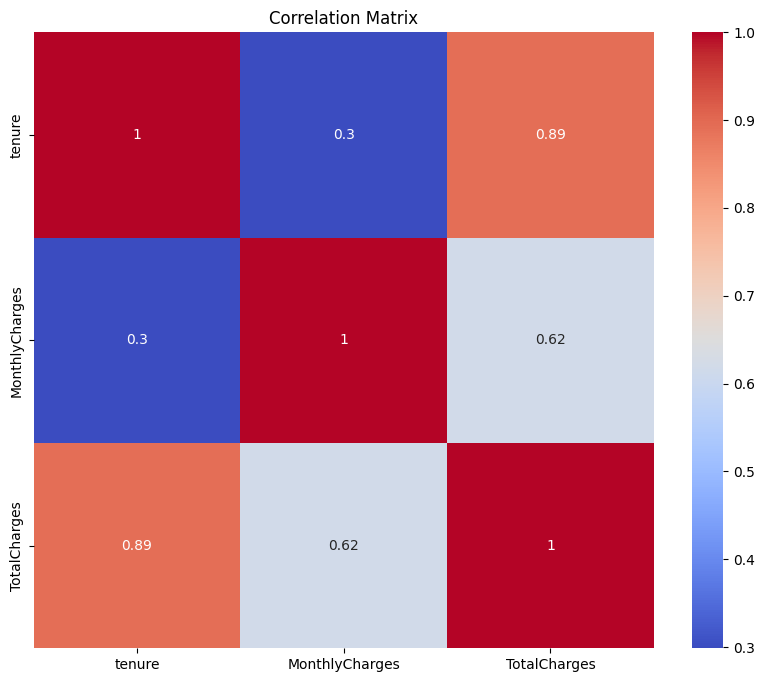

In [1588]:

# Drop non-numeric columns or columns with non-numeric values
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Handle missing values if any
df_numeric.dropna(inplace=False)  # Example, you may have a different strategy for handling missing data

# Calculate correlation matrix for numeric columns
corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


###### Tenure
###### - There is a high frequency of customers with very low tenure (near 0 months), indicating many new or short-term customers.
###### - There's another spike at the maximum tenure value (around 70 months), suggesting a significant number of long-term customers.
###### - This distribution suggests that customers tend to either leave early or stay for a long time, with fewer customers having mid-range tenure.


###### MonthlyCharges
###### - There is a high concentration of customers with low monthly charges (around $20-$30).
###### - As the charges increase, the number of customers initially drops but then increases and peaks again around $70-$90 before declining.
###### - This indicates two main groups of customers: those paying low monthly charges and those paying moderate to high monthly charges.


###### TotalCharges
###### - The majority of customers have low total charges, which aligns with many customers having short tenures.
###### - The number of customers decreases steadily as total charges increase, showing a right-skewed distribution.
###### - There are very few customers with extremely high total charges
###### - The total charges are largely driven by tenure, with newer customers having lower total charges and long-term customers accumulating higher charges over time.

Churn Value Counts: Churn
No     3706
Yes    1336
Name: count, dtype: int64
Churn Rate: 26.492167360697998


C:\Users\pc\AppData\Local\Temp\ipykernel_23996\3803423705.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn',data=main_df,color='blue', palette={'Yes': 'skyblue', 'No': 'skyblue'})


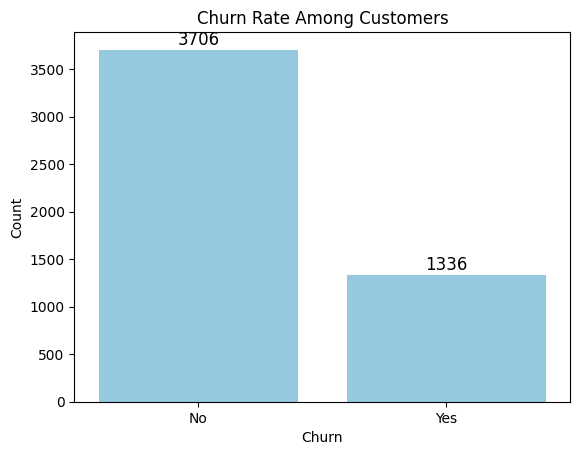

In [1589]:
## calculate number of customers who have churned and who have not
churn_value_counts = main_df['Churn'].value_counts()
print("Churn Value Counts:", churn_value_counts)
# Calculate the total number of customers
total_customers = len(main_df)

# Calculate the number of customers who churned
churned_customers = len(main_df.loc[main_df['Churn'] == 'Yes'])

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

print("Churn Rate:", churn_rate)
# reset index
main_df.reset_index(inplace=True)
# distribution of churn


# Annotate each bar with its count value
for index, value in enumerate(churn_value_counts):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

# distribution of churn
sns.countplot(x='Churn',data=main_df,color='blue', palette={'Yes': 'skyblue', 'No': 'skyblue'})
plt.title('Churn Rate Among Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

###### The above correlation matrix explains the strength of the relationship between the following columns;
######       TotalCharges, Monthlycharges, tenure
###### - there is a strong positive correlation between the tenure and totalcharges made by the customer i.e the longer the customer stays with the company the higher the totalcharges made.
###### - Also the higher the monthly charges the higher the total charges made by the customers this also suggest a positive correlation.

- Bi- Variate Analysis

Check for relationship among the numerical values in the dataset

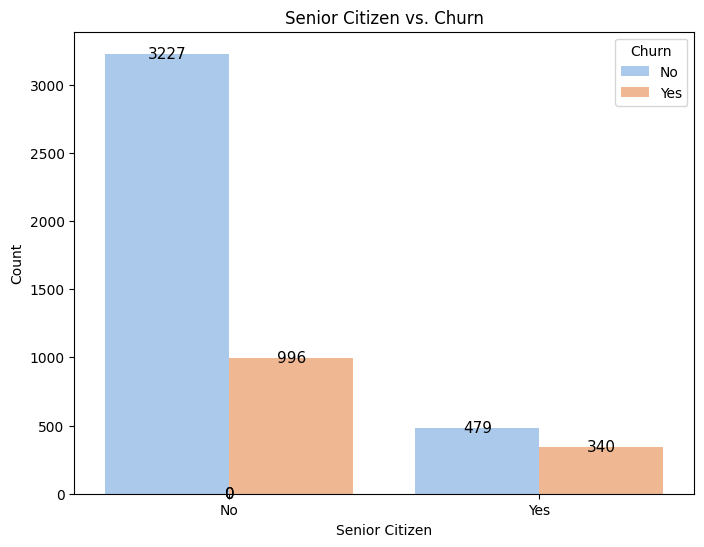

In [1590]:
# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=main_df, palette='pastel')
plt.title('Senior Citizen vs. Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# Adding annotations
for p in plt.gca().patches:
    height = p.get_height()  # get the height of each bar
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.2,
                   '{:1.0f}'.format(height),  # annotate the value
                   ha='center', va='center', fontsize=11, color='black')

plt.show()

###### The visualization indicates that most senior citizens have churned, while a considerable number of younger customers remain with the company. Although younger customers constitute a larger percentage of the company's customer base, senior citizens exhibit the highest ratio of churn to retention. This trend could be attributed to an increase in charges affecting senior customers.

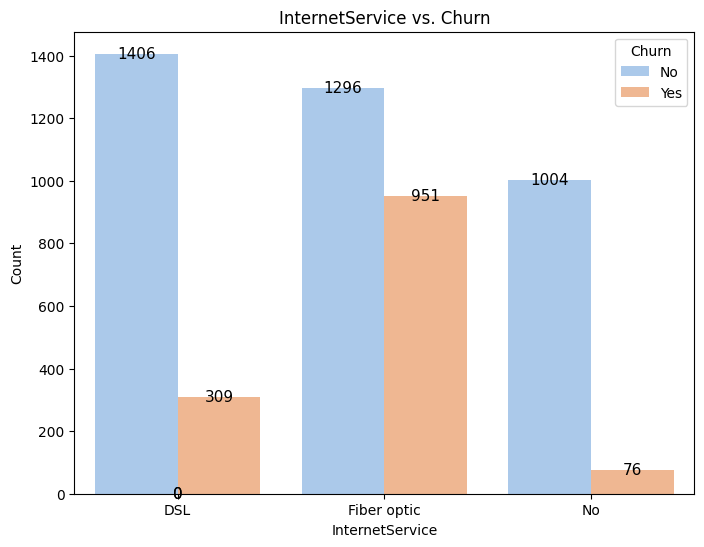

In [1591]:
# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=main_df, palette='pastel')
plt.title('InternetService vs. Churn')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# Adding annotations
for p in plt.gca().patches:
    height = p.get_height()  # get the height of each bar
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.2,
                   '{:1.0f}'.format(height),  # annotate the value
                   ha='center', va='center', fontsize=11, color='black')

plt.show()

###### - The interpretation suggests that InternetService is an important factor influencing customer churn behavior.
###### - from the above visualization we can observe that customers using fiberoptics has a higher churn rate compared to those with DSL and those without internet service.

#### 4. Answer Analytical questions with visulizations

- i. what is the proportion of cusotmers who have churned to those who have not 

Churn Value Counts: Churn
No     3706
Yes    1336
Name: count, dtype: int64
Churn Rate: 26.492167360697998


C:\Users\pc\AppData\Local\Temp\ipykernel_23996\234413920.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn',data=main_df,color='blue', palette={'Yes':'skyblue', 'No': 'skyblue'})


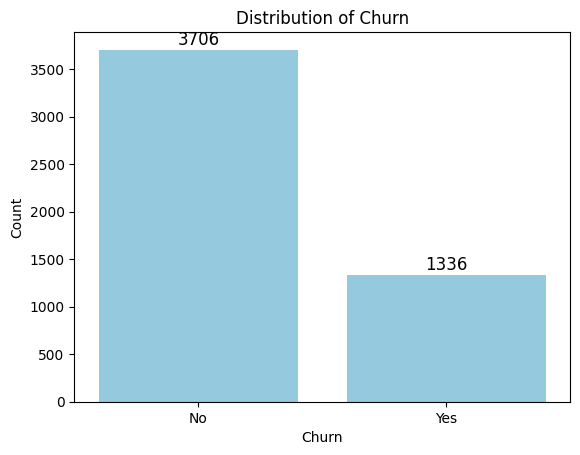

In [1592]:
# calculate number of customers who have churned and who have not
churn_value_counts = main_df['Churn'].value_counts()
print("Churn Value Counts:", churn_value_counts)
# Calculate the total number of customers
total_customers = len(main_df)

# Calculate the number of customers who churned
churned_customers = len(main_df.loc[main_df['Churn'] == 'Yes'])

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

# Annotate each bar with its count value
for index, value in enumerate(churn_value_counts):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

print("Churn Rate:", churn_rate)
# distribution of churn
sns.countplot(x='Churn',data=main_df,color='blue', palette={'Yes':'skyblue', 'No': 'skyblue'})
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

- ii. Are senior citizens more likely to churn compared to younger customers?

C:\Users\pc\AppData\Local\Temp\ipykernel_23996\3722308762.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = main_df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100


<Figure size 800x600 with 0 Axes>

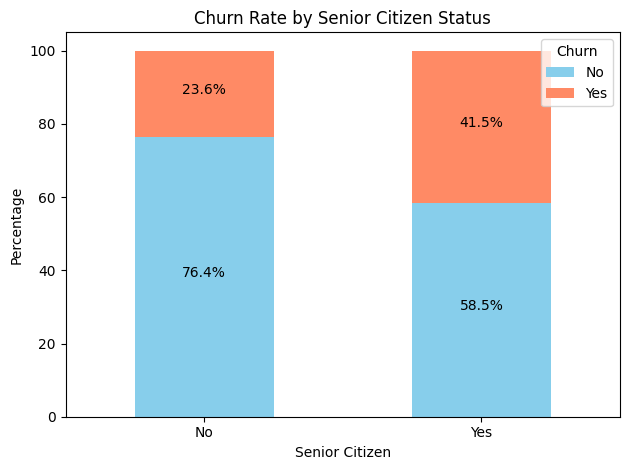

In [1593]:
# Calculate churn rates
churn_rates = main_df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot the churn rates
plt.figure(figsize=(8, 6))
ax = churn_rates.plot(kind='bar', stacked=True, color=['skyblue', '#ff8a65'])

# Adding annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', fontsize=10, color='black')

plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()

###### The bar chart illustrates the churn rate by senior citizen status. Among non-senior citizens, the majority, approximately 74%, remain with the company, as indicated by the larger yellow section of the bar. Conversely, about 26% of non-senior citizens have churned, shown by the smaller orange section of the bar. For senior citizens, the churn rate is noticeably higher. Approximately 42% of senior citizens stay with the company, while around 58% have churned, as reflected by the larger orange section. This indicates that senior citizens have a significantly higher churn rate compared to non-senior citizens. Despite constituting a smaller percentage of the overall customer base, senior citizens are more likely to leave the company. This suggests that factors such as increased charges or other issues may disproportionately impact senior citizens, leading to their higher churn rate.

- iii  How do churn rates vary between customers using DSL, Fiber Optic, or no internet service?

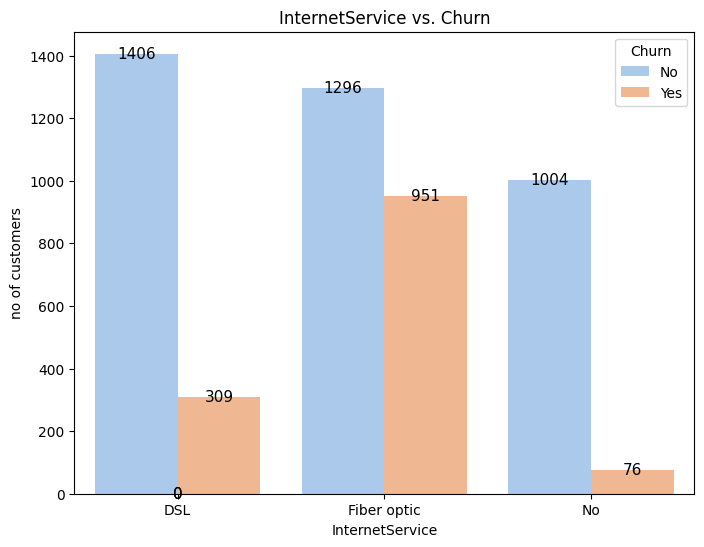

In [1594]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=main_df, palette='pastel')
plt.title('InternetService vs. Churn')
plt.xlabel('InternetService')
plt.ylabel('no of customers')
plt.legend(title='Churn', loc='upper right')
# Adding annotations
for p in plt.gca().patches:
    height = p.get_height()  # get the height of each bar
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.2,
                   '{:1.0f}'.format(height),  # annotate the value
                   ha='center', va='center', fontsize=11, color='black')

plt.show()


###### The bar chart compares the churn rates across different types of internet services (DSL, Fiber optic, and No internet service). Customers using DSL internet service exhibit the lowest churn rate, with over 1,400 customers remaining and fewer than 300 customers churning. In contrast, customers with fiber optic internet service show a higher churn rate. While around 1,300 fiber optic users do not churn, approximately 900 customers do leave, indicating a significant churn rate. For customers without internet service, the churn rate is low, with about 1,000 customers staying and very few churning. Overall, the data suggests that DSL users have the highest retention rates, followed by those without internet service, whereas fiber optic users are more prone to churn, indicating potential issues with fiber optic service driving higher customer departures.

- iv. Is there any pattern in customer churn based on gender?

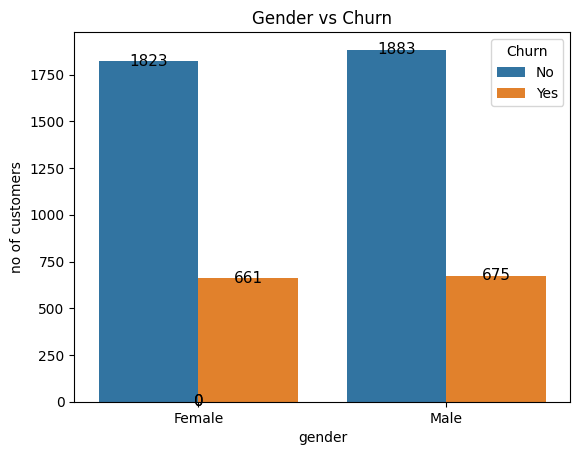

In [1595]:
sns.countplot(main_df, x='gender',hue='Churn')
plt.xlabel('gender')
plt.ylabel('no of customers')
plt.title('Gender vs Churn')

# Adding annotations
for p in plt.gca().patches:
    height = p.get_height()  # get the height of each bar
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.2,
                   '{:1.0f}'.format(height),  # annotate the value
                   ha='center', va='center', fontsize=11, color='black')
plt.show()

###### The churn rate by gender, we can see that the churn rate for female customers is slightly higher at 26.6% compared to 26.4% for male customers. 

###### However, the difference is relatively small, suggesting that gender alone may not be a strong predictor of customer churn.


 -  v. Do customers with Longer tenure have less churn ?

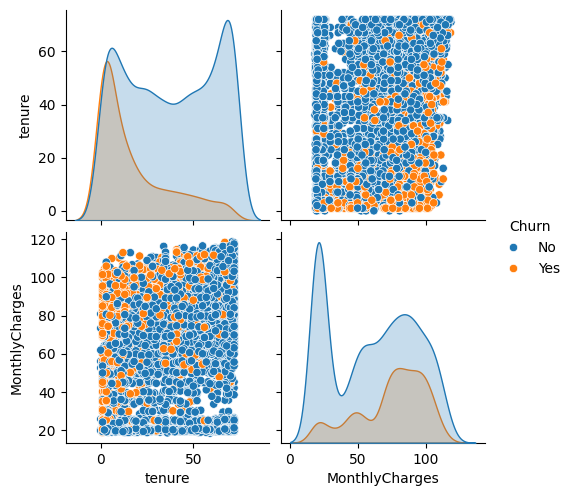

In [1596]:
sns.pairplot(main_df,vars=['tenure','MonthlyCharges'],hue='Churn')
plt.show()

###### Customer with longer tenure has less churn

### 3. Data Preparation

#### 1. Split data set into X, y

- X =input_column
- y =input_column

In [1597]:
# Drop rows where the target column has NaN values
df_cleaned = main_df.dropna(subset=['Churn'])


In [1598]:
# # split data into x and y and drop index,coustomerID and churn columns
X = df_cleaned.drop(columns=['index','customerID','Churn'], axis =1)  
y = df_cleaned['Churn']

##### 2. Split data set into training and evaluation

In [1599]:
# split X,y into train and test set using the train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42,stratify=y)
X_train,X_test,y_train,y_test

(      gender SeniorCitizen Partner Dependents  tenure PhoneService  \
 3454  Female           Yes     Yes         No       1          Yes   
 4023  Female           Yes      No         No      51          Yes   
 1460    Male            No      No         No       5          Yes   
 2322  Female            No      No        Yes      49          Yes   
 2349    Male            No     Yes        Yes      72          Yes   
 ...      ...           ...     ...        ...     ...          ...   
 419   Female           Yes      No         No       1          Yes   
 2818    Male            No     Yes        Yes      29          Yes   
 3020  Female            No      No         No      41          Yes   
 2876    Male            No      No         No      19          Yes   
 31      Male           Yes     Yes         No       2          Yes   
 
      MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
 3454            No     Fiber optic                   No         

-  3. Feature Engineering (Creating New Features, (binning & bucketing), Handling Missing Data, Encoding, Standardization, 
        Normalization, Scaling)

-    Encoding the target data

In [1600]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

- Seperate the numerical and categorical data in the input data

In [1601]:
# Select only categoriacal columns
categorical_columns = X.select_dtypes(['category','object']).columns.tolist()
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [1602]:
# Select only numeric columns
numeric_columns = X.select_dtypes('number').columns.tolist()
numeric_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

In [1603]:
X.select_dtypes('number').skew()

tenure            0.225416
MonthlyCharges   -0.238663
TotalCharges      0.944216
dtype: float64

In [1604]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('power_transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', RobustScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical data', numerical_transformer, numeric_columns),
        ('categorical data', categorical_transformer, categorical_columns)
    ]
)


In [1605]:
preprocessor 

ColumnTransformer(transformers=[('numerical data',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('power_transformer',
                                                  PowerTransformer()),
                                                 ('scaler', RobustScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('categorical data',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [1606]:
transformed_data = preprocessor.fit_transform(X)
pd.DataFrame(transformed_data)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.966092,-0.758073,-1.106466,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.099201,-0.249947,0.141602,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.885604,-0.307318,-0.852125,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.293159,-0.522619,0.128787,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.885604,0.002742,-0.769487,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,-0.108676,0.259295,0.167390,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5038,0.681172,0.590902,0.943198,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5039,-0.465256,-0.762845,-0.533855,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5040,-0.760540,0.070295,-0.571986,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


-  Modelling and Evaluation

In [1607]:
models =[
    ('Decision Tree',DecisionTreeClassifier(random_state=42)),
    ('SVC',SVC(random_state=42,probability=True)),
    ('Random Forest',RandomForestClassifier(random_state=42)),
    ('Logistic Regression',LogisticRegression(random_state=42))
]
# Mapping dictionary
label_map = {'No': 0, 'Yes': 1}

- Train unbalanced data
    

In [1608]:
unbalanced_table =pd.DataFrame(columns =['Model','Accuracy','Precision','Recall','f1_score'])
unbalanced_pipeline = {}
for model_name, classifier in models:
    pipeline =Pipeline(steps =[
        ('preprocessor',preprocessor),
        ('classifier',classifier)
    ])
    pipeline.fit(X_train,y_train)
    unbalanced_pipeline[model_name] = pipeline
    y_pred = pipeline.predict(X_test)
    # Map the string predictions to binary format
    y_pred_mapped = np.array([label_map[pred] for pred in y_pred])
    
    report = classification_report(y_test_encoded,y_pred_mapped)
    # Print the results
    
    unbalanced_metrics = classification_report(y_test_encoded,y_pred_mapped,output_dict=True)
    
    accuracy = unbalanced_metrics['accuracy']
    precision = unbalanced_metrics['weighted avg']['precision']
    recall = unbalanced_metrics['weighted avg']['recall']
    f1 = unbalanced_metrics['weighted avg']['f1-score']
    
    unbalanced_table.loc[len(unbalanced_table)] = [model_name,accuracy,precision,recall,f1]
    
unbalanced_table.sort_values(by='f1_score',ascending=False).round(2)
    
    

,Model,Accuracy,Precision,Recall,f1_score
3,Logistic Regression,0.80,0.80,0.80,0.80
1,SVC,0.80,0.79,0.80,0.79
2,Random Forest,0.78,0.77,0.78,0.77
0,Decision Tree,0.71,0.73,0.71,0.71


- Generating Confusion Matrix

In [1609]:
all_confusion_matrix = {}

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_mapped)

all_confusion_matrix[model_name] = conf_matrix

all_confusion_matrix


{'Logistic Regression': array([[663,  79],
        [119, 148]])}

<Axes: >

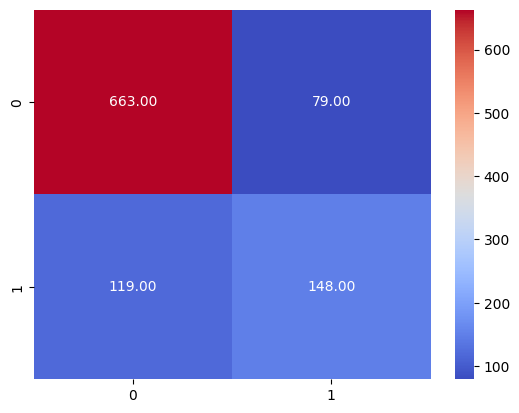

In [1610]:
logistic_matrix = all_confusion_matrix['Logistic Regression']
sns.heatmap(logistic_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

In [1611]:
Logistic = unbalanced_pipeline['Logistic Regression']
Logistic

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [1612]:
svc = unbalanced_pipeline['SVC']
svc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', SVC(probability=True, random_state=42))])

- Train balanced Data

In [1613]:
balanced_table =pd.DataFrame(columns =['Model','Accuracy','Precision','Recall','f1_score'])
balanced_pipeline = {}
for model_name, classifier in models:
    pipeline =imbPipeline(steps =[
        ('preprocessor',preprocessor),
        ('over-sampler',SMOTE(random_state=42)),
        ('feature_selection',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier)
    ])
    pipeline.fit(X_train,y_train)
    balanced_pipeline[model_name] = pipeline
    
    y_pred = pipeline.predict(X_test)
    # Map the string predictions to binary format
    y_pred_mapped = np.array([label_map[pred] for pred in y_pred])
    
    report = classification_report(y_test_encoded,y_pred_mapped)
    
    balanced_metrics = classification_report(y_test_encoded,y_pred_mapped,output_dict=True)
    
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']
    
    balanced_table.loc[len(balanced_table)] = [model_name,accuracy,precision,recall,f1 ]
    
balanced_table.sort_values(by='f1_score',ascending=False).round(2)

,Model,Accuracy,Precision,Recall,f1_score
1,SVC,0.77,0.80,0.77,0.78
2,Random Forest,0.78,0.78,0.78,0.78
3,Logistic Regression,0.76,0.81,0.76,0.77
0,Decision Tree,0.73,0.75,0.73,0.74


In [1614]:
Logistic_reg = balanced_pipeline['Logistic Regression']
Logistic_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot...
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('over-sampler', SMOTE(random_state=42)),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000018E2A77D670>)),
                ('classifier', LogisticRegression(random_state=42))])

- Visualize ROC curve

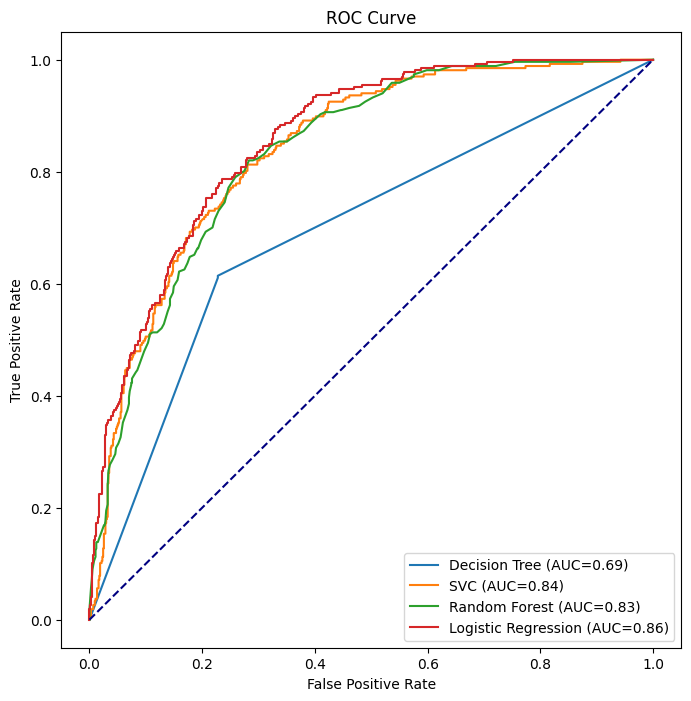

In [1615]:
from sklearn.metrics import auc,roc_curve
roc_curve_data = {}

fig ,ax = plt.subplots(figsize=(8,8))

for model_name,pipeline in balanced_pipeline.items():
    
    y_score = pipeline.predict_proba(X_test)[:,1]
    
    fpr, tpr, threshold = roc_curve(y_test_encoded,y_score)
    roc_auc = auc(fpr,tpr)
    
    roc_curve_df= pd.DataFrame({
        'False Positive Rate':fpr,
        'True Positive Rate':tpr,
        'Threshold':threshold,
    })
    roc_curve_data[model_name] = roc_curve_df
    
    ax.plot(fpr, tpr, label=f'{model_name} (AUC={roc_auc:.2f})')
    
ax.plot([0, 1],[0, 1],color = 'navy',linestyle = '--' )
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')
plt.show()

In [1616]:
unbalanced_pipeline  = unbalanced_pipeline ['Logistic Regression']

roc_curve_data['Logistic Regression'].tail(50).round(2)

,False Positive Rate,True Positive Rate,Threshold
212,0.36,0.90,0.37
213,0.36,0.90,0.36
214,0.36,0.90,0.36
215,0.37,0.90,0.35
216,0.37,0.90,0.35
217,0.37,0.90,0.35
218,0.37,0.91,0.35
219,0.38,0.91,0.35
220,0.38,0.91,0.34
221,0.38,0.91,0.34


- Training Models on a Balanced Data Set

In [1617]:
balanced_data_models =[
    ('Decision Tree',DecisionTreeClassifier(random_state=42)),
    ('SVC',SVC(random_state=42,probability=True)),
    ('Random Forest',RandomForestClassifier(random_state=42)),
    ('Logistic Regression',LogisticRegression(random_state=42))
]

balanced_pipeline = {}

balanced_table =pd.DataFrame(columns =['Model','Accuracy','Precision','Recall','f1_score'])

for model_name, classifier in models:
    pipeline =imbPipeline(steps =[
        ('preprocessor',preprocessor),
        ('over-sampler',SMOTE(random_state=42)),
        ('feature_selection',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier)
    ])
    pipeline.fit(X_train,y_train)
    balanced_pipeline[model_name] = pipeline
    
    y_pred = pipeline.predict(X_test)
    # Map the string predictions to binary format
    y_pred_mapped = np.array([label_map[pred] for pred in y_pred])
    
    report = classification_report(y_test_encoded,y_pred_mapped)
    
    balanced_metrics = classification_report(y_test_encoded,y_pred_mapped,output_dict=True)
    
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']
    
    balanced_table.loc[len(balanced_table)] = [model_name,accuracy,precision,recall,f1 ]
    
balanced_table.sort_values(by='f1_score',ascending=False).round(2)

,Model,Accuracy,Precision,Recall,f1_score
1,SVC,0.77,0.80,0.77,0.78
2,Random Forest,0.78,0.78,0.78,0.78
3,Logistic Regression,0.76,0.81,0.76,0.77
0,Decision Tree,0.73,0.75,0.73,0.74


- The models performed better on the inbalanced dataset so we use the inbalance dataset for evaluation and hyperameter tuning

- #####  `Hyperparameter Tuning`

In [1618]:
# Define the hyperparameters to search

param_grids = {

    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },

    'Logistic Regression': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],        
        'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'classifier__max_iter': [300]
    },

    'SVC': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'classifier__gamma': ['scale', 'auto']
    },

    'Random Forest': {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    } 

    }


params = {}
search_histories = {}

for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(
        estimator = final_pipeline, 
        param_grid = param_grid, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
        scoring = ['f1_weighted', 'precision', 'recall'],
        refit = 'f1_weighted',
        verbose = 3, 
        n_jobs = -1
    )
    grid_search.fit(X_train, y_train_encoded)
    params[model_name] = grid_search
        
    search_history = pd.DataFrame(grid_search.cv_results_)        
    search_histories[model_name] = search_history

for model_name, grid_search in params.items():
    print(f'Best hyperparamters for {model_name}:{grid_search.best_params_}')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparamters for Decision Tree:{'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best hyperparamters for SVC:{'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best hyperparamters for Random Forest:{'classifier__max_depth': 10, 'classifier__n_estimators': 50}
Best hyperparamters for Logistic Regression:{'classifier__C': 1, 'classifier__max_iter': 300, 'classifier__solver': 'lbfgs'}


- Getting Models with the best hyperparameters

In [1619]:
def get_best_models(params):
    best_models = []
    for model_name, grid_search in params.items():
        best_model = grid_search.best_estimator_
        best_models.append((model_name, best_model))    
    
    return best_models
 
best_models = get_best_models(params)

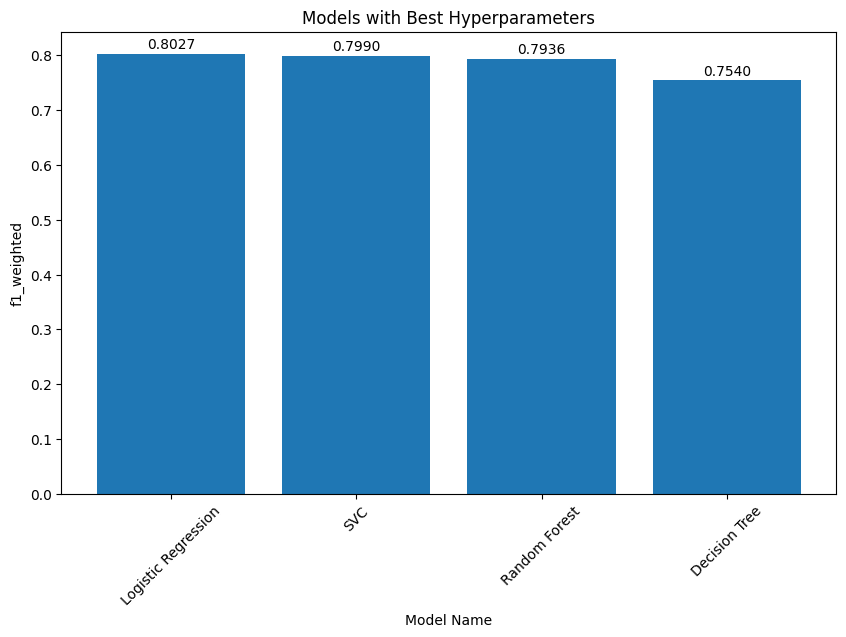

In [1620]:
# Get models f1_weighted scores and names
model_names = [model_name for model_name in search_histories.keys()]
model_scores = [search_history['mean_test_f1_weighted'].max() for search_history in search_histories.values()]

# Create a DataFrame to for plot
df_models = pd.DataFrame({'model_name': model_names, 'f1_score': model_scores})
df_models = df_models.sort_values(by='f1_score', ascending=False)


# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(data=df_models, x='model_name', height='f1_score')

# Add text labels to the bars
for i, score in enumerate(df_models['f1_score']):
    plt.text(i, score+0.01, '{:1.4f}'.format(score), ha="center")

plt.xlabel('Model Name')
plt.ylabel('f1_weighted')
plt.title('Models with Best Hyperparameters')
plt.xticks(rotation=45)
plt.show()

- Comparing models before and after hyperparameter tuning by using f1 score (weighted) metric.

In [1621]:
# Extract the best f1_scores from GridSearchCV results
tuning_results = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'SVC', 'Random Forest'],
    'f1_score_after': [
        params['Decision Tree'].best_score_,
        params['Logistic Regression'].best_score_,
        params['SVC'].best_score_,
        params['Random Forest'].best_score_
    ]
})

# Check the columns in unbalanced_table
print("Columns in unbalanced_table:", unbalanced_table.columns)

# Merge unbalanced results with tuning results
df_models = unbalanced_table[['Model', 'f1_score']]
metric_before_after_tuning_models = pd.merge(
    df_models, 
    tuning_results, 
    on='Model', 
    how='inner', 
    suffixes=('_before', '_after')
).sort_values(ascending=False, by='f1_score_after')

# Display the final results
print(metric_before_after_tuning_models)

Columns in unbalanced_table: Index(['Model', 'Accuracy', 'Precision', 'Recall', 'f1_score'], dtype='object')
                 Model  f1_score  f1_score_after
3  Logistic Regression  0.798397        0.802735
1                  SVC  0.794114        0.799038
2        Random Forest  0.773999        0.793557
0        Decision Tree  0.714330        0.754045


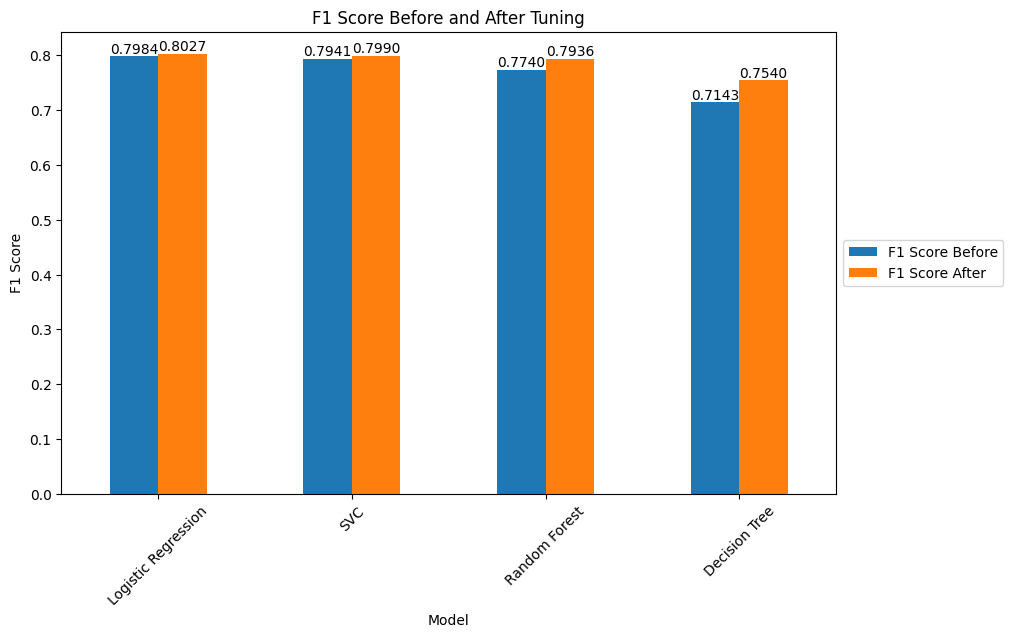

In [1622]:
# Plotting the results on a histogram
ax = metric_before_after_tuning_models.plot(kind='bar', x='Model', y=['f1_score', 'f1_score_after'], figsize=(10, 6))
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Before and After Tuning')
plt.xticks(rotation=45)
plt.legend(['F1 Score Before', 'F1 Score After'], loc='center left', bbox_to_anchor=(1, 0.5))

# Annotate the values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

- Feature Importance Visualization

In [1623]:
feature_columns = Logistic.named_steps['preprocessor'].get_feature_names_out()
feature_columns = np.array([col.split('__')[-1]for col in feature_columns])
feature_columns

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_On

In [1624]:
# Extracting the coefficients
coefficients = Logistic.named_steps['classifier'].coef_[0]
importances = np.abs(coefficients)

# Creating the importance DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# Sorting the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
2,TotalCharges,1.584816
39,Contract_Two year,1.082566
18,InternetService_No,1.030610
17,InternetService_Fiber optic,1.019278
37,Contract_Month-to-month,0.789252
1,MonthlyCharges,0.626349
34,StreamingMovies_No,0.302755
13,MultipleLines_No,0.279616
40,PaperlessBilling_No,0.279210
30,TechSupport_Yes,0.275707


In [1625]:
# Access the coefficients since best model is logistic regression
coefficients = Logistic.named_steps['classifier'].coef_[0]

coefficients_df = pd.DataFrame({'Feature': feature_columns, 'Coefficient': coefficients})

# Magnitude of impact
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df.sort_values(by="Absolute Coefficient", ascending=False, inplace=True)

coefficients_df

,Feature,Coefficient,Absolute Coefficient
2,TotalCharges,-1.584816,1.584816
39,Contract_Two year,-1.082566,1.082566
18,InternetService_No,-1.030610,1.030610
17,InternetService_Fiber optic,1.019278,1.019278
37,Contract_Month-to-month,0.789252,0.789252
1,MonthlyCharges,0.626349,0.626349
34,StreamingMovies_No,-0.302755,0.302755
13,MultipleLines_No,-0.279616,0.279616
40,PaperlessBilling_No,-0.279210,0.279210
30,TechSupport_Yes,-0.275707,0.275707


C:\Users\pc\AppData\Local\Temp\ipykernel_23996\4161993508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='coolwarm')


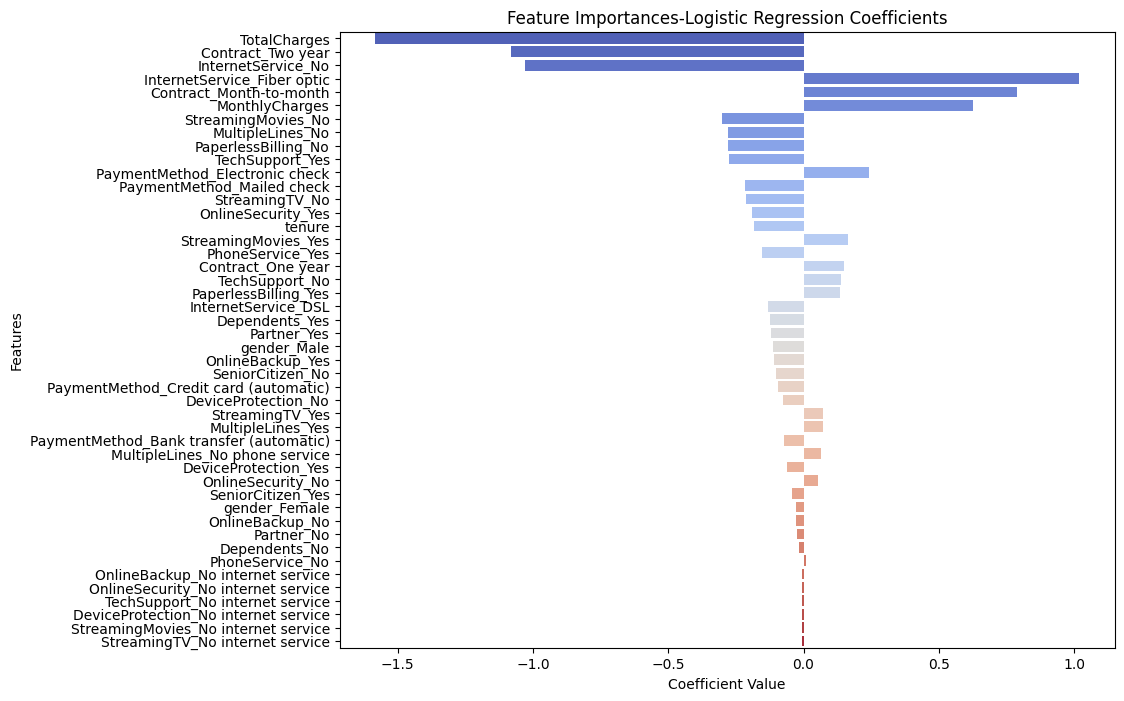

In [1626]:
# Visualizing the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='coolwarm')
plt.title('Feature Importances-Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

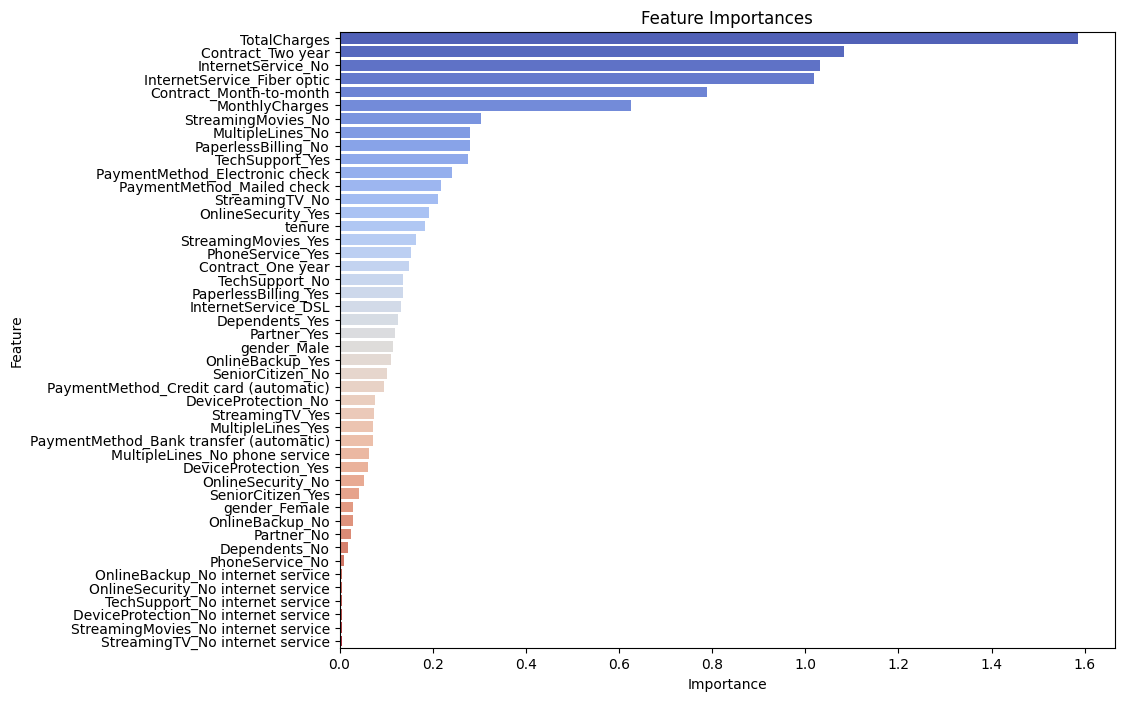

In [1627]:
plt.figure(figsize=(10, 8))

sns.barplot(x='Importance',y='Feature',data=importance_df,palette='coolwarm',hue='Feature',legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

- ##### Evaluating the best model on the evaluation set

In [1628]:
y_test_pred = best_model.predict(X_test)
print(f'Classification report of the best model- {model_name}\n\n{classification_report(y_true=y_test_encoded, y_pred = y_test_pred)}')

Classification report of the best model- Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       742
           1       0.53      0.52      0.53       267

    accuracy                           0.75      1009
   macro avg       0.68      0.68      0.68      1009
weighted avg       0.75      0.75      0.75      1009



- Preparing the test dataset

In [1629]:
test_df = pd.read_csv('../data/Telco-churn-last-2000.csv')
test_df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [1630]:
# convert the totalcharge column to numerical datatype
test_df['TotalCharges'] =pd.to_numeric(test_df['TotalCharges'],errors='coerce')

In [1631]:
#define a dictionary to map boolean and None values to a meaningful categories
mapping_new_cat_values = {
    'Partner':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes',},
    'Dependents':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'PhoneService':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'MultipleLines':{ False:'No', True:'Yes', 'No':'No', 'No phone service':'No phone service' , 'Yes':'Yes'},
    'OnlineSecurity':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service' },
    'OnlineBackup':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'DeviceProtection':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'TechSupport':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingTV':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingMovies':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'PaperlessBilling':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'SeniorCitizen':{0:'No',1:'Yes'}
    }
    # convert the columns to category_column
for col in mapping_new_cat_values.keys():
    test_df[col] = test_df[col].astype('category')
# map the boolean and None values to meaningful categories  

test_df.replace(mapping_new_cat_values, inplace=True)
test_df.head(20)

C:\Users\pc\AppData\Local\Temp\ipykernel_23996\81992991.py:21: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  test_df.replace(mapping_new_cat_values, inplace=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,No,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,9513-DXHDA,Male,No,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
5,0516-QREYC,Female,Yes,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,459.95
6,9685-WKZGT,Male,Yes,No,No,14,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,1036.75
7,6022-UGGSO,Female,Yes,No,No,32,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,2276.95
8,8084-OIVBS,Female,No,No,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.00,211.95
9,8896-BQTTI,Male,No,No,No,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.00,25.00


In [1632]:
# # split data into x and y and drop index,coustomerID and churn columns test_df.drop(columns=['customerID',], axis =1)  
test_df.drop(columns= ['customerID'], axis =1) 
                      

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,No,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,Male,No,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,No,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,Female,No,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30
1997,Male,Yes,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70
1998,Male,Yes,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [1633]:
Logistic

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [1634]:

# Print the best parameters
print(f'Best hyperparameters for Logistic Regression: {grid_search.best_params_}')

# Get the best estimator
best_estimator_logistic = grid_search.best_estimator_
#print(f'Best estimator for Logistic Regression: {best_estimator_logistic}')
best_estimator_logistic

Best hyperparameters for Logistic Regression: {'classifier__C': 1, 'classifier__max_iter': 300, 'classifier__solver': 'lbfgs'}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=300, random_state=42))])

In [1635]:
y_aftertest_pred = Logistic.predict(test_df)
y_aftertest_pred

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [1636]:
#  Churn prediction on the test data using the Forest Regression.

test_df['Churn'] = decoded_predictions
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,No,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,No,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2,9513-DXHDA,Male,No,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,No
4,3801-HMYNL,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes


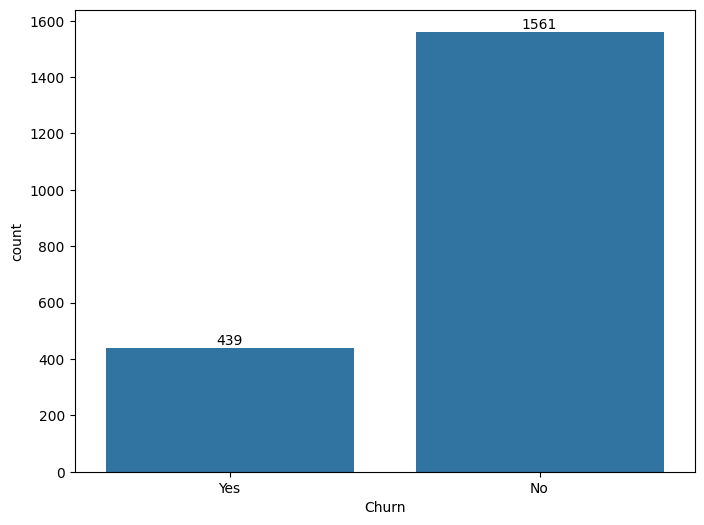

In [1637]:
# Create the figure
plt.figure(figsize=(8, 6))

ax=sns.countplot(test_df, x='Churn')

# Add count values on top of each bar
for p in ax.patches:
    count = int(p.get_height())  # Convert count to integer
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

##### 6. Model Persistence

In [1638]:
#Components to export

with open('logistic_churn_model_comp.pkl', 'wb') as f:
    joblib.dump(Logistic, f)

with open('svc_churn_model_components.pkl', 'wb') as f:
    joblib.dump(svc, f)